In [2]:
import numpy as np

from tensorflow.keras import layers, models
from tensorflow.keras.datasets import reuters
from tensorflow.keras.utils import to_categorical

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data()

/home/master/anaconda3/envs/tf/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/master/anaconda3/envs/tf/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [4]:
train_data.shape, test_data.shape

((8982,), (2246,))

In [5]:
def vectorize(sequences, dim=40000):
    results = np.zeros((len(sequences), dim))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
        
    return results

In [6]:
x_train = vectorize(train_data)
x_test = vectorize(test_data)

In [7]:
from tensorflow.keras.utils import to_categorical

In [8]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [12]:
x_train.shape, y_train.shape

((8982, 40000), (8982, 46))

In [17]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(40000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [18]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [19]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

partial_x_train.shape, partial_y_train.shape

((7982, 40000), (7982, 46))

In [20]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
16/16 [==============================] - 2s 88ms/step - loss: 3.2812 - accuracy: 0.4478 - val_loss: 1.8498 - val_accuracy: 0.6550
Epoch 2/20
16/16 [==============================] - 1s 72ms/step - loss: 1.5622 - accuracy: 0.6990 - val_loss: 1.3552 - val_accuracy: 0.7190
Epoch 3/20
16/16 [==============================] - 1s 64ms/step - loss: 1.0777 - accuracy: 0.7803 - val_loss: 1.1709 - val_accuracy: 0.7510
Epoch 4/20
16/16 [==============================] - 1s 74ms/step - loss: 0.8153 - accuracy: 0.8350 - val_loss: 1.0701 - val_accuracy: 0.7920
Epoch 5/20
16/16 [==============================] - 1s 69ms/step - loss: 0.6250 - accuracy: 0.8756 - val_loss: 1.0416 - val_accuracy: 0.7930
Epoch 6/20
16/16 [==============================] - 1s 72ms/step - loss: 0.4987 - accuracy: 0.9033 - val_loss: 0.9765 - val_accuracy: 0.8120
Epoch 7/20
16/16 [==============================] - 1s 67ms/step - loss: 0.3860 - accuracy: 0.9261 - val_loss: 0.9579 - val_accuracy: 0.8120
Epoch 8/20
16

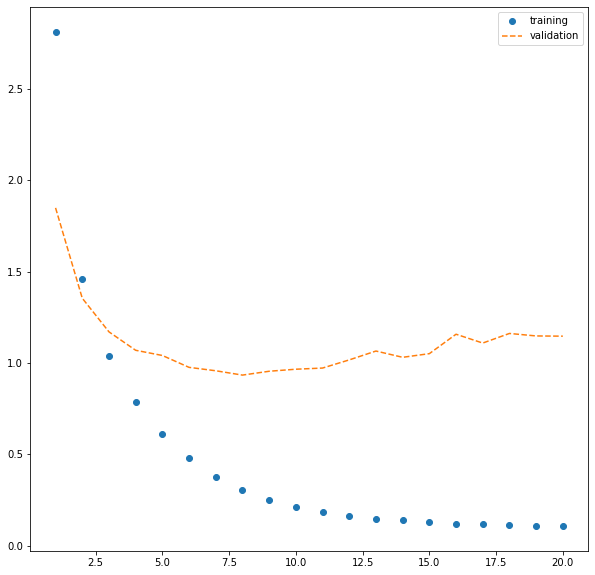

In [21]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

fig = plt.figure(figsize=(10, 10))
epoch = range(1, len(loss_values) + 1)
plt.plot(epoch, loss_values, 'o', label='training')
plt.plot(epoch, val_loss_values, '--', label='validation')
plt.legend()
plt.show()

In [23]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 3s 38ms/step - loss: 1.2789 - accuracy: 0.7778


[1.2788673639297485, 0.777827262878418]

In [24]:
predictions = model.predict(x_test)

In [25]:
predictions[0]

array([1.1396407e-07, 1.5934644e-07, 1.7101270e-08, 9.9570650e-01,
       4.0000598e-03, 4.3385664e-09, 2.1739907e-10, 2.5574399e-08,
       4.0270985e-05, 3.1020511e-07, 2.9941333e-08, 8.8671441e-05,
       1.0896956e-06, 1.2205101e-05, 9.8914557e-09, 1.5602734e-07,
       9.5037385e-06, 1.1393424e-08, 2.5275773e-08, 8.1986713e-05,
       5.1643412e-05, 2.8718450e-06, 1.2097595e-07, 2.2104874e-08,
       4.3466621e-08, 2.0896202e-08, 7.7679141e-11, 1.0862065e-08,
       1.3833554e-07, 1.0453169e-06, 1.3863265e-06, 1.1650310e-09,
       2.5194911e-08, 9.5479613e-10, 8.1690274e-07, 9.2247704e-10,
       3.9721488e-07, 3.0127064e-11, 7.5794475e-08, 3.2142131e-10,
       1.4024044e-08, 2.7827824e-07, 9.4678470e-09, 2.0089107e-10,
       8.9451540e-09, 1.0775134e-11], dtype=float32)

In [26]:
np.sum(predictions[0])

1.0000001

In [27]:
np.argmax(predictions[0])

3